In [333]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Класичне машинне навчання
## Навчання з учителем. Регресія
## Лінійна регресія

## напишіть функцію гіпотези лінійної регресії у векторному вигляді

## Лінійна регресія з однією змінною (h)
h(x) = w_0 + w_1 * x  #  залежність від одного параметру

якщо розглядати залежність від одного параметру (почергово для багатьох)

In [334]:
def h(w_0: float, w_1: float, x: float) -> float:
    """
    Return the value of the linear regression hypothesis of dependence on one parameter.
    w_0, w_1: weights;
    x: parameter.
    """
    return w_0 + w_1 * x

## створіть функцію для обчислення функції втрат у векторному вигляді (loss_function)

In [335]:
def loss_function(w_0: float, w_1: float, df: pd.DataFrame, idx_x: int, idx_y: int) -> float:
    """Calculation of the loss function in vector form (for dependence on one parameter).
    w_0, w_1: weights;
    df: DataFrame;
    idx_x: index of column in df for parameter (x);
    idx_y: index of column in df for result-function (y).
    """
    n: int = df.shape[0]
    cost = 0
    for x, y in zip(df.iloc[:, idx_x], df.iloc[:, idx_y]):
        cost += (y - h(w_0, w_1, x)) ** 2

    return cost / (2 * n)

## реалізуйте один крок градієнтного спуску

In [336]:
def grad_step_op(weights: tuple, grads: tuple, learning_rate: float = 0.01) -> tuple:
    """Function of one step of gradient descent with one parameter. Return the weights."""
    w_0, w_1 = weights
    grad_0, grad_1 = grads
    w_0 -= learning_rate * grad_0
    w_1 -= learning_rate * grad_1
    
    return w_0, w_1  # (w_0, w_1)

## знайдіть найкращі параметри w⃗ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень
## знайдіть ці ж параметри за допомогою аналітичного рішення
? на око?
## порівняйте отримані результати

In [337]:
def grad_w_0(w_0: float, w_1: float, df: pd.DataFrame, idx_x: int, idx_y: int) -> float:
    """Calculation of the graduation descent weight 0 (for dependence on one parameter).
    w_0, w_1: weights;
    df: DataFrame;
    idx_x: index of column in df for parameter (x);
    idx_y: index of column in df for result-function (y).
    """
    n: int = df.shape[0]
    cost = 0
    for x, y in zip(df.iloc[:, idx_x], df.iloc[:, idx_y]):
        cost += (h(w_0, w_1, x) - y)

    return cost/n

In [338]:
def grad_w_1(w_0: float, w_1: float, df: pd.DataFrame, idx_x: int, idx_y: int) -> float:
    """Calculation of the graduation descent weight 1 (for dependence on one parameter).
    w_0, w_1: weights;
    df: DataFrame;
    idx_x: index of column in df for parameter (x);
    idx_y: index of column in df for result-function (y).
    """
    n: int = df.shape[0]
    cost = 0
    for x, y in zip(df.iloc[:, idx_x], df.iloc[:, idx_y]):
        cost += (h(w_0, w_1, x) - y) * x

    return cost/n

In [339]:
def grad_descent(
                 weights: tuple, 
                 df: pd.DataFrame, 
                 num_iter: int, 
                 idx_x: int = 1,
                 idx_y: int = 0,
                 learning_rate: float = 0.01, 
                 epsilon: float = 0.0000001
                 ) -> tuple:
    """Gradient descent function with one parameter. Return weights and story of the descent."""
    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df, idx_x=idx_x, idx_y=idx_y)
    loss_history = [loss]
    for i in range(num_iter):
        d_w_0 = grad_w_0(w_0, w_1, df, idx_x=idx_x, idx_y=idx_y)
        d_w_1 = grad_w_1(w_0, w_1, df, idx_x=idx_x, idx_y=idx_y)
        grads = (d_w_0, d_w_1)
        w_0, w_1 = grad_step_op(weights, grads, learning_rate=learning_rate)
        weights = (w_0, w_1)
        loss = loss_function(w_0, w_1, df, idx_x=idx_x, idx_y=idx_y)
        loss_history.append(loss)
        if abs(loss - loss_history[-2]) <= epsilon:
            break

    return w_0, w_1, loss_history

In [340]:
df = pd.read_csv('Housing.csv')
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [341]:
def normalization(data) -> list:
    mean: float = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean) / value_range
        result.append(norm_x)
        
    return result

In [342]:
norm_df = pd.DataFrame()
norm_df['price'] = normalization(df.price)
norm_df['area'] = normalization(df.area)
norm_df['bedrooms'] = normalization(df.bedrooms)
norm_df['bathrooms'] = normalization(df.bathrooms)


<Axes: xlabel='bathrooms', ylabel='price'>

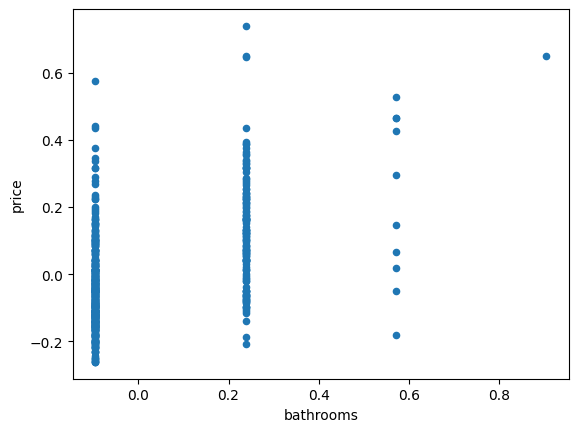

In [343]:
norm_df.plot(x='bathrooms', y='price', kind='scatter')

# idx_x = 1  => area

In [344]:
w_0, w_1, history = grad_descent((0., 0.), df=norm_df, num_iter=3000, learning_rate=0.1)

In [345]:
print(w_0, '\n', w_1, '\n', history)

5.256243961998277e-17 
 0.5370185545993247 
 [0.013088679029173688, 0.013071998071880324, 0.013055391112733966, 0.013038857823472602, 0.013022397877290348, 0.013006010948831033, 0.012989696714181874, 0.012973454850866876, 0.012957285037840686, 0.012941186955482053, 0.012925160285587626, 0.012909204711365667, 0.01289331991742972, 0.012877505589792369, 0.012861761415859116, 0.012846087084422189, 0.01283048228565433, 0.012814946711102651, 0.012799480053682649, 0.012784082007672087, 0.012768752268704907, 0.012753490533765231, 0.012738296501181386, 0.012723169870619973, 0.012708110343079905, 0.012693117620886436, 0.012678191407685356, 0.012663331408437135, 0.012648537329411003, 0.012633808878179274, 0.01261914576361146, 0.012604547695868542, 0.012590014386397274, 0.012575545547924453, 0.012561140894451232, 0.012546800141247481, 0.012532523004846191, 0.012518309203037772, 0.01250415845486458, 0.012490070480615354, 0.012476045001819593, 0.012462081741242137, 0.012448180422877698, 0.0124343407

In [346]:
def line_normalization(data, line) -> list:
    """Return normalized values (list) of the array_like object (data) by original data."""
    mean: float = np.mean(data)
    value_range = np.max(data) - np.min(data)

    return [(x - mean) / value_range for x in line] 

In [347]:
# Розв'язання задачі лінійної регресії за допомогою sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
X = np.array([norm_df.area]).T
y = np.array(norm_df.price)
reg = LinearRegression().fit(X, y)

In [348]:
# intercept_  =>  Independent term in the linear model  (w_0)
# coef_  =>  Estimated coefficients for the linear regression problem. (w_1,)
# score(X, y[, sample_weight])  =>  Return the coefficient of determination of the prediction.
reg.intercept_, reg.coef_, reg.score(X, y)

(6.353102831524844e-17, array([0.58196837]), 0.2872931546811467)

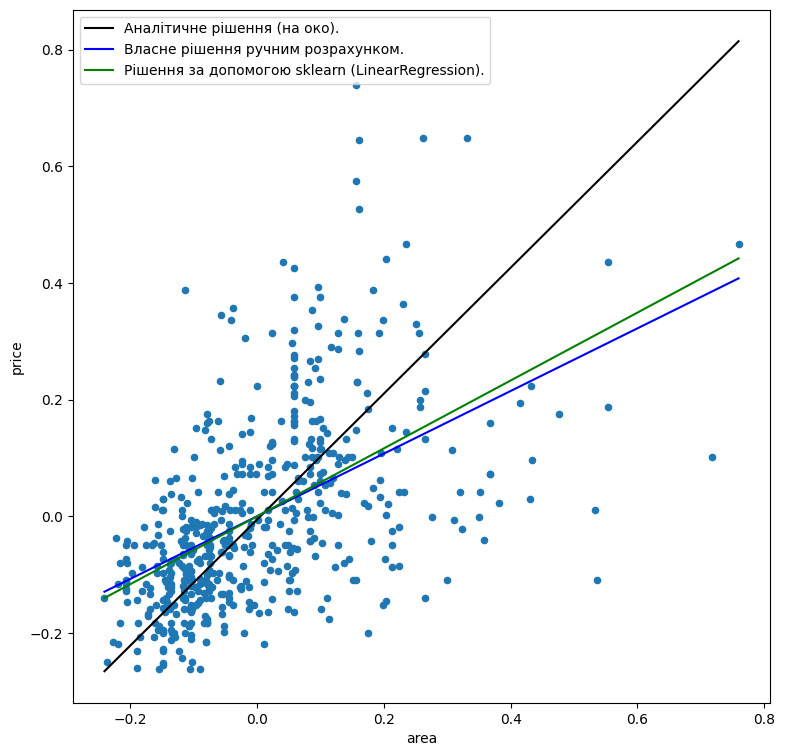

In [349]:
prep_df = pd.DataFrame()
prep_df['price'] = line_normalization(df.price, [0.2 * (10 ** 7), 0.8 * (10 ** 7)])
prep_df['area'] = line_normalization(df.area, [2000, 9000])

x = np.linspace(np.min(norm_df.area), np.max(norm_df.area), 3)
y1 = [h(w_0, w_1, xi) for xi in x]
y2 = [h(reg.intercept_, reg.coef_[0], xi) for xi in x]
y3 = (prep_df.price[1] - prep_df.price[0]) * (x - prep_df.area[0]) / (prep_df.area[1] - prep_df.area[0]) + prep_df.price[0]


norm_df.plot(x='area', y='price', kind='scatter', figsize=(9,9))

plt.plot(x, y3, label='Аналітичне рішення (на око).', color='black')
plt.plot(x, y1, label='Власне рішення ручним розрахунком.', color='blue')
plt.plot(x, y2, label='Рішення за допомогою sklearn (LinearRegression).', color='green')
plt.legend()
plt.show()

In [350]:
loss_result_y1 = history[-1]

y2_df = norm_df.copy(deep=True)

loss_result_y2 = loss_function(reg.intercept_, reg.coef_[0], y2_df, 1, 0)  # 1 => area, 0 => price

new_x = norm_df.area.copy(deep=True)
y3 = [(prep_df.price[1] - prep_df.price[0]) * (x - prep_df.area[0]) / (prep_df.area[1] - prep_df.area[0]) + prep_df.price[0] for x in new_x]
y3_df = norm_df.copy(deep=True)
y3_df['price'] = y3

loss_result_y3 = loss_function(
    (prep_df.price[0] - prep_df.price[1]) * prep_df.area[0] / (prep_df.area[1] - prep_df.area[0]) + prep_df.price[0], 
    (prep_df.price[1] - prep_df.price[0]) / (prep_df.area[1] - prep_df.area[0]), 
    y3_df, 
    1, 
    0
    )  # 1 => area, 0 => price

loss_result_y1, loss_result_y2, loss_result_y3

(0.009350823668203436, 0.009328391140273446, 3.915765369548129e-34)

In [351]:
loss_result_y1 / loss_result_y3

2.387993862176298e+31

In [352]:
loss_result_y2 / loss_result_y3

2.3822650899407495e+31

In [353]:
loss_result_y1 / loss_result_y2

1.0024047585047269

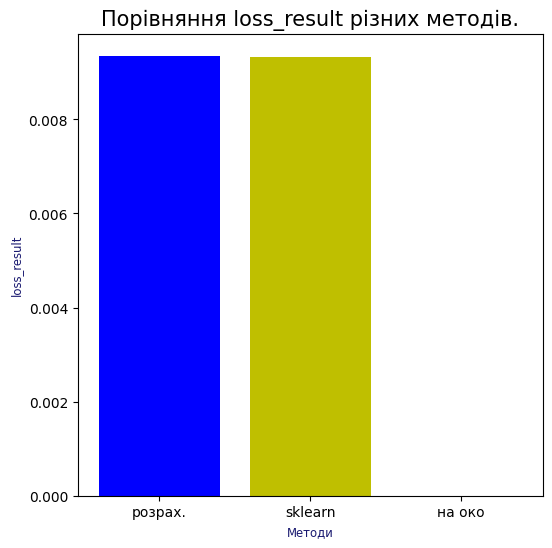

In [354]:
plt.figure(figsize=(6, 6))
plt.bar(['розрах.', 'sklearn', 'на око'], [loss_result_y1, loss_result_y2, loss_result_y3], color=['b', 'y', 'g'])  # на око, але лише враховуючи один параметр
plt.xlabel("Методи", fontsize="small", color="midnightblue")
plt.ylabel("loss_result", fontsize="small", color="midnightblue")
plt.title("Порівняння loss_result різних методів.", fontsize=15)
plt.show()

# idx_x = 2  => bedrooms

In [355]:
w_0, w_1, history = grad_descent((0., 0.), df=norm_df, idx_x=2, num_iter=3000, learning_rate=0.1)

In [356]:
print(w_0, '\n', w_1, '\n', history)

4.911463692424314e-17 
 0.35620139546374313 
 [0.013088679029173688, 0.013081040014575935, 0.013073434192867786, 0.013065861419820314, 0.013058321551831094, 0.013050814445921833, 0.013043339959735322, 0.01303589795153303, 0.013028488280192343, 0.013021110805203727, 0.013013765386668262, 0.013006451885294956, 0.01299917016239796, 0.012991920079894108, 0.012984701500300145, 0.012977514286730416, 0.012970358302893828, 0.012963233413091508, 0.012956139482214465, 0.012949076375740477, 0.012942043959732008, 0.012935042100833441, 0.012928070666268807, 0.012921129523838792, 0.012914218541918628, 0.012907337589455508, 0.012900486535966007, 0.012893665251533825, 0.012886873606806976, 0.012880111472995658, 0.012873378721869578, 0.012866675225755795, 0.012860000857535919, 0.012853355490644128, 0.012846738999064373, 0.012840151257328295, 0.012833592140512594, 0.01282706152423694, 0.012820559284661272, 0.01281408529848381, 0.012807639442938456, 0.012801221595792516, 0.012794831635344544, 0.012788469

In [357]:
# Розв'язання задачі лінійної регресії за допомогою sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
X = np.array([norm_df.bedrooms]).T
y = np.array(norm_df.price)
reg = LinearRegression().fit(X, y)

In [358]:
# intercept_  =>  Independent term in the linear model  (w_0)
# coef_  =>  Estimated coefficients for the linear regression problem. (w_1,)
# score(X, y[, sample_weight])  =>  Return the coefficient of determination of the prediction.
reg.intercept_, reg.coef_, reg.score(X, y)

(6.656547057932253e-17, array([0.40207278]), 0.1343178709279369)

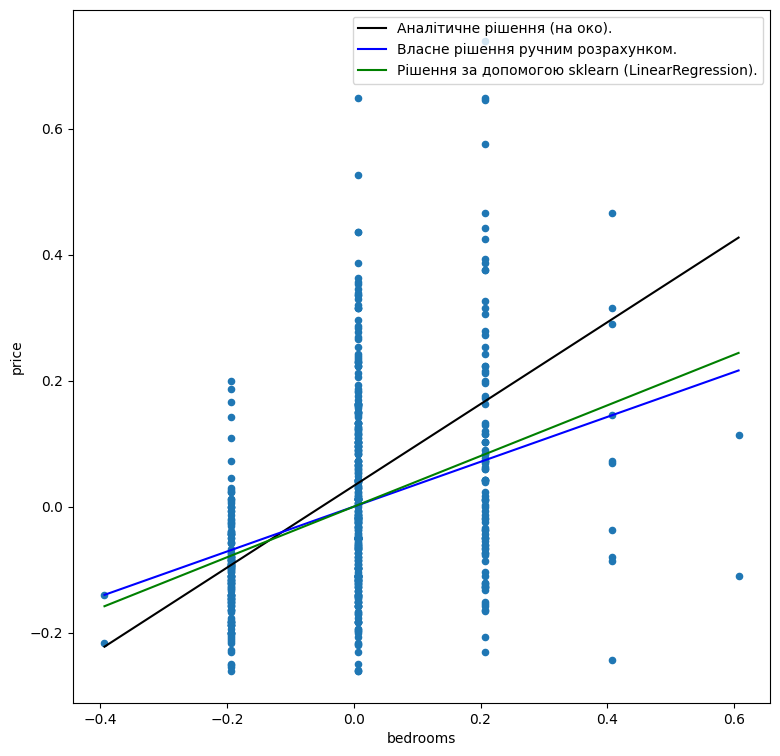

In [359]:
prep_df = pd.DataFrame()
prep_df['price'] = line_normalization(df.price, [0.22 * (10 ** 7), 0.82 * (10 ** 7)])
prep_df['bedrooms'] = line_normalization(df.bedrooms, [1, 5])

x = np.linspace(np.min(norm_df.bedrooms), np.max(norm_df.bedrooms), 3)
y1 = [h(w_0, w_1, xi) for xi in x]
y2 = [h(reg.intercept_, reg.coef_[0], xi) for xi in x]
y3 = (prep_df.price[1] - prep_df.price[0]) * (x - prep_df.bedrooms[0]) / (prep_df.bedrooms[1] - prep_df.bedrooms[0]) + prep_df.price[0]

norm_df.plot(x='bedrooms', y='price', kind='scatter', figsize=(9,9))

plt.plot(x, y3, label='Аналітичне рішення (на око).', color='black')
plt.plot(x, y1, label='Власне рішення ручним розрахунком.', color='blue')
plt.plot(x, y2, label='Рішення за допомогою sklearn (LinearRegression).', color='green')
plt.legend()
plt.show()

In [360]:
loss_result_y1 = history[-1]

y2_df = norm_df.copy(deep=True)

loss_result_y2 = loss_function(reg.intercept_, reg.coef_[0], y2_df, 2, 0)  # 2 => bedrooms, 0 => price

new_x = norm_df.bedrooms.copy(deep=True)
y3 = [(prep_df.price[1] - prep_df.price[0]) * (x - prep_df.bedrooms[0]) / (prep_df.bedrooms[1] - prep_df.bedrooms[0]) + prep_df.price[0] for x in new_x]
y3_df = norm_df.copy(deep=True)
y3_df['price'] = y3

loss_result_y3 = loss_function(
    (prep_df.price[0] - prep_df.price[1]) * prep_df.bedrooms[0] / (prep_df.bedrooms[1] - prep_df.bedrooms[0]) + prep_df.price[0], 
    (prep_df.price[1] - prep_df.price[0]) / (prep_df.bedrooms[1] - prep_df.bedrooms[0]), 
    y3_df, 
    2, 
    0
    )  # 2 => bedrooms, 0 => price

loss_result_y1, loss_result_y2, loss_result_y3

(0.0113535180538437, 0.011330635528716004, 5.788391282396866e-34)

In [361]:
loss_result_y1 / loss_result_y3

1.9614289186653633e+31

In [362]:
loss_result_y2 / loss_result_y3

1.9574757434200606e+31

In [363]:
loss_result_y2 / loss_result_y1

0.9979845432033334

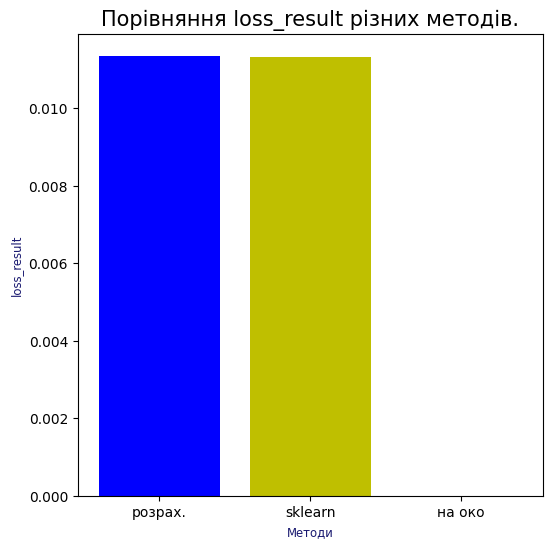

In [364]:
plt.figure(figsize=(6, 6))
plt.bar(['розрах.', 'sklearn', 'на око'], [loss_result_y1, loss_result_y2, loss_result_y3], color=['b', 'y', 'g'])  # на око, але лише враховуючи один параметр
plt.xlabel("Методи", fontsize="small", color="midnightblue")
plt.ylabel("loss_result", fontsize="small", color="midnightblue")
plt.title("Порівняння loss_result різних методів.", fontsize=15)
plt.show()

# idx_x = 3  => bathrooms

In [365]:
w_0, w_1, history = grad_descent((0., 0.), df=norm_df, idx_x=3, num_iter=3000, learning_rate=0.1)

In [366]:
print(w_0, '\n', w_1, '\n', history)

3.3133536689042533e-17 
 0.4648462644751711 
 [0.013088679029173688, 0.013069072819263413, 0.01304957625582806, 0.013030188725676817, 0.013010909619048, 0.012991738329589936, 0.012972674254342153, 0.012953716793715823, 0.012934865351475642, 0.012916119334720583, 0.01289747815386524, 0.012878941222621683, 0.012860507957980471, 0.0128421777801929, 0.01282395011275232, 0.012805824382376022, 0.012787800018987683, 0.012769876455698893, 0.012752053128791381, 0.01273432947769971, 0.012716704944993253, 0.01269917897635871, 0.012681751020582964, 0.012664420529535179, 0.012647186958150255, 0.012630049764411077, 0.012613008409331869, 0.012596062356941069, 0.012579211074264445, 0.012562454031308437, 0.012545790701043507, 0.01252922055938732, 0.01251274308518852, 0.012496357760210434, 0.012480064069114286, 0.012463861499443615, 0.012447749541607505, 0.012431727688865139, 0.012415795437309566, 0.012399952285851824, 0.012384197736205405, 0.012368531292870253, 0.012352952463117444, 0.01233746075697374

In [367]:
# Розв'язання задачі лінійної регресії за допомогою sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
X = np.array([norm_df.bathrooms]).T
y = np.array(norm_df.price)
reg = LinearRegression().fit(X, y)

In [368]:
# intercept_  =>  Independent term in the linear model  (w_0)
# coef_  =>  Estimated coefficients for the linear regression problem. (w_1,)
# score(X, y[, sample_weight])  =>  Return the coefficient of determination of the prediction.
reg.intercept_, reg.coef_, reg.score(X, y)

(5.5411935388514236e-17, array([0.50040491]), 0.2678531783916027)

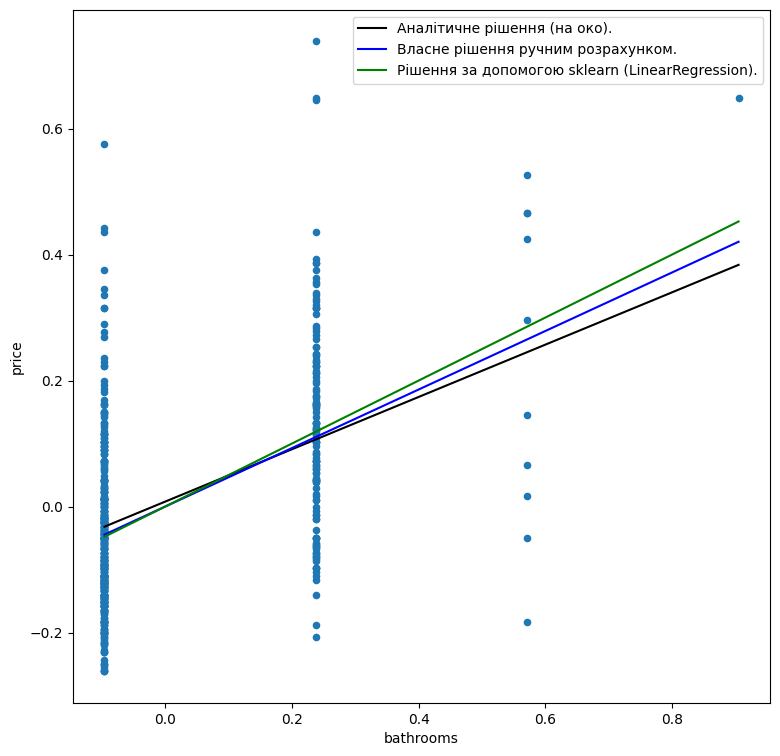

In [369]:
prep_df = pd.DataFrame()
prep_df['price'] = line_normalization(df.price, [0.44 * (10 ** 7), 0.76 * (10 ** 7)])
prep_df['bathrooms'] = line_normalization(df.bathrooms, [1, 3])

x = np.linspace(np.min(norm_df.bathrooms), np.max(norm_df.bathrooms), 3)
y1 = [h(w_0, w_1, xi) for xi in x]
y2 = [h(reg.intercept_, reg.coef_[0], xi) for xi in x]
y3 = (prep_df.price[1] - prep_df.price[0]) * (x - prep_df.bathrooms[0]) / (prep_df.bathrooms[1] - prep_df.bathrooms[0]) + prep_df.price[0]

norm_df.plot(x='bathrooms', y='price', kind='scatter', figsize=(9,9))

plt.plot(x, y3, label='Аналітичне рішення (на око).', color='black')
plt.plot(x, y1, label='Власне рішення ручним розрахунком.', color='blue')
plt.plot(x, y2, label='Рішення за допомогою sklearn (LinearRegression).', color='green')
plt.legend()
plt.show()

In [370]:
loss_result_y1 = history[-1]

y2_df = norm_df.copy(deep=True)

loss_result_y2 = loss_function(reg.intercept_, reg.coef_[0], y2_df, 3, 0)  # 3 => bathrooms, 0 => price

new_x = norm_df.bathrooms.copy(deep=True)
y3 = [(prep_df.price[1] - prep_df.price[0]) * (x - prep_df.bathrooms[0]) / (prep_df.bathrooms[1] - prep_df.bathrooms[0]) + prep_df.price[0] for x in new_x]
y3_df = norm_df.copy(deep=True)
y3_df['price'] = y3

loss_result_y3 = loss_function(
    (prep_df.price[0] - prep_df.price[1]) * prep_df.bathrooms[0] / (prep_df.bathrooms[1] - prep_df.bathrooms[0]) + prep_df.price[0], 
    (prep_df.price[1] - prep_df.price[0]) / (prep_df.bathrooms[1] - prep_df.bathrooms[0]), 
    y3_df, 
    3, 
    0
    )  # 3 => bathrooms, 0 => price

loss_result_y1, loss_result_y2, loss_result_y3

(0.00960053746363738, 0.009582834750262031, 9.682656968111975e-35)

In [371]:
loss_result_y1 / loss_result_y3

9.915189080078907e+31

In [372]:
loss_result_y2 / loss_result_y3

9.896906171334284e+31

In [373]:
loss_result_y1 / loss_result_y2

1.0018473357661588

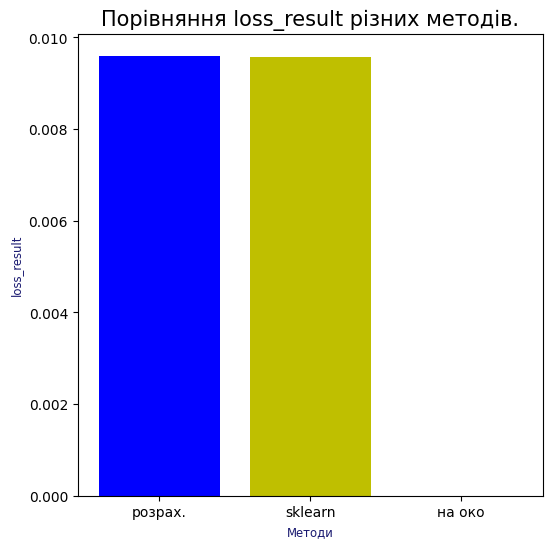

In [374]:
plt.figure(figsize=(6, 6))
plt.bar(['розрах.', 'sklearn', 'на око'], [loss_result_y1, loss_result_y2, loss_result_y3], color=['b', 'y', 'g'])  # на око, але лише враховуючи один параметр
plt.xlabel("Методи", fontsize="small", color="midnightblue")
plt.ylabel("loss_result", fontsize="small", color="midnightblue")
plt.title("Порівняння loss_result різних методів.", fontsize=15)
plt.show()